## 0.1  Final Project Submission

Please fill out:


Student name: Monica Haderthauer

Student pace: full time

Scheduled project review date/time: Friday, 3/11

Instructor name: Praveen Gowtham

Blog post URL: https://medium.com/@monicalaurenh/the-beginning-of-my-data-science-journey-9ae20ba16e87

## Import and read files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 

In [2]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

## Merging IMDB and Box Office Mojo

I decided to merge the Box office Mojo csv and the principals, movie basics, and movie ratings imdb tables
from SQL to create a complete table with titles, job category, domestic gross revenue, and genre.

In [3]:
person = pd.read_sql("""
SELECT *
  FROM persons
  INNER JOIN principals 
  USING (person_id)
  INNER JOIN movie_basics
  USING (movie_id)
  INNER JOIN movie_ratings
  USING (movie_id)
""", conn)

In [4]:
person.head(10)

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,ordering,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer",tt2398241,9,producer,producer,None,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",6.0,15612
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt0433397,7,composer,None,None,Satin,Satin,2011,84.0,"Comedy,Drama,Music",4.7,214
2,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt1681372,8,composer,None,None,Caesar and Otto's Deadly Xmas,Caesar and Otto's Deadly Xmas,2012,83.0,"Comedy,Horror",4.0,127
3,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt2281215,7,composer,None,None,Elf-Man,Elf-Man,2012,86.0,"Comedy,Family,Fantasy",3.6,582
4,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt2387710,8,composer,None,None,Journey to the Forbidden Valley,Journey to the Forbidden Valley,2017,96.0,"Action,Adventure,Family",5.4,50
5,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt2749258,8,composer,None,None,Somebody Marry Me,Somebody Marry Me,2013,101.0,"Comedy,Romance",4.9,56
6,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt3564200,9,composer,None,None,Tooken,Tooken,2015,80.0,"Action,Comedy",3.6,1388
7,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department",tt2547632,10,cinematographer,None,None,The Only Real Game,The Only Real Game,2013,82.0,"Documentary,Sport",7.3,23
8,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department",tt7697870,8,cinematographer,None,None,Sky and Ground,Sky and Ground,2018,86.0,Documentary,8.7,23
9,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department",tt8171864,6,cinematographer,None,None,Grit,Grit,2018,80.0,Documentary,7.6,14


In [5]:

all_titles = pd.merge(person, bom_df, how = 'inner', left_on='primary_title', right_on='title')

In [6]:
all_titles.head(50)

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,ordering,category,job,characters,...,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer",tt2398241,9,producer,producer,None,...,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,152200000,2017
1,nm0038432,Kelly Asbury,1960.0,NaN,"art_department,animation_department,director",tt2398241,5,director,None,None,...,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,152200000,2017
2,nm0449549,Jordan Kerner,NaN,NaN,"producer,actor,executive",tt2398241,10,producer,producer,None,...,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,152200000,2017
3,nm0962596,Pamela Ribon,1975.0,NaN,"writer,producer,actress",tt2398241,7,writer,written by,None,...,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,152200000,2017
4,nm0678963,Peyo,1928.0,1992.0,"writer,director,music_department",tt2398241,8,writer,based on the characters and works of,None,...,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,152200000,2017
5,nm0542133,Joe Manganiello,1976.0,NaN,"actor,stunts,producer",tt2398241,3,actor,None,"[""Hefty Smurf""]",...,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,152200000,2017
6,nm0933988,Rainn Wilson,1966.0,NaN,"actor,producer,soundtrack",tt2398241,2,actor,None,"[""Gargamel""]",...,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,152200000,2017
7,nm1416215,Demi Lovato,1992.0,NaN,"soundtrack,actress,music_department",tt2398241,1,actress,None,"[""Smurfette""]",...,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,152200000,2017
8,nm1632630,Stacey Harman,NaN,NaN,"writer,miscellaneous,producer",tt2398241,6,writer,written by,None,...,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,152200000,2017
9,nm1442113,Jack McBrayer,1973.0,NaN,"actor,soundtrack,producer",tt2398241,4,actor,None,"[""Clumsy Smurf""]",...,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,152200000,2017


In [7]:
all_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29385 entries, 0 to 29384
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   person_id           29385 non-null  object 
 1   primary_name        29385 non-null  object 
 2   birth_year          16231 non-null  float64
 3   death_year          595 non-null    float64
 4   primary_profession  29071 non-null  object 
 5   movie_id            29385 non-null  object 
 6   ordering            29385 non-null  int64  
 7   category            29385 non-null  object 
 8   job                 10142 non-null  object 
 9   characters          11801 non-null  object 
 10  primary_title       29385 non-null  object 
 11  original_title      29385 non-null  object 
 12  start_year          29385 non-null  int64  
 13  runtime_minutes     29006 non-null  float64
 14  genres              29335 non-null  object 
 15  averagerating       29385 non-null  float64
 16  numv

## Cleaning Data

I started cleaning the merged table by using isna and sum functions to find the total of missing data points in the merged table.

In [8]:
all_titles.isna().sum()

person_id                 0
primary_name              0
birth_year            13154
death_year            28790
primary_profession      314
movie_id                  0
ordering                  0
category                  0
job                   19243
characters            17584
primary_title             0
original_title            0
start_year                0
runtime_minutes         379
genres                   50
averagerating             0
numvotes                  0
title                     0
studio                   30
domestic_gross          209
foreign_gross         11596
year                      0
dtype: int64

I dropped the columns that I wasn't planning to use in my recommendations- birth year, death year, charaters, runtime, and foreign gross. I also planned to use the "category" column to identify directors and actors which didn't have any missing data points. I dropped the primary profession and job columns because they duplicated the info I was using from "category" and both primary profession and job columns contained missing data points.

In [9]:
#dropping columns that I don't plan to utilize 
all_titles.drop(columns = ['birth_year','foreign_gross', 'death_year', 'primary_profession', 'job'], inplace = True)

In [10]:
all_titles.head()

,person_id,primary_name,movie_id,ordering,category,characters,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,year
0,nm0061671,Mary Ellen Bauder,tt2398241,9,producer,None,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,2017
1,nm0038432,Kelly Asbury,tt2398241,5,director,None,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,2017
2,nm0449549,Jordan Kerner,tt2398241,10,producer,None,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,2017
3,nm0962596,Pamela Ribon,tt2398241,7,writer,None,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,2017
4,nm0678963,Peyo,tt2398241,8,writer,None,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,2017


In [11]:
all_titles.isna().sum()

person_id              0
primary_name           0
movie_id               0
ordering               0
category               0
characters         17584
primary_title          0
original_title         0
start_year             0
runtime_minutes      379
genres                50
averagerating          0
numvotes               0
title                  0
studio                30
domestic_gross       209
year                   0
dtype: int64

I used the dropna function to drop missing data points from genre, studio, and domestic gross. These were all columns I planned to use for my analysis and it made the most sense to drop the missing points because it wasn't a large amount of drops compared to the overall dataset. 

In [12]:
all_titles.dropna(subset = ['genres', 'studio', 'domestic_gross'], inplace = True)

In [13]:
all_titles.isna().sum()

person_id              0
primary_name           0
movie_id               0
ordering               0
category               0
characters         17429
primary_title          0
original_title         0
start_year             0
runtime_minutes      361
genres                 0
averagerating          0
numvotes               0
title                  0
studio                 0
domestic_gross         0
year                   0
dtype: int64

In [14]:
all_titles.drop(columns = ['characters', 'runtime_minutes'], inplace = True)

In [15]:
all_titles.isna().sum()

person_id         0
primary_name      0
movie_id          0
ordering          0
category          0
primary_title     0
original_title    0
start_year        0
genres            0
averagerating     0
numvotes          0
title             0
studio            0
domestic_gross    0
year              0
dtype: int64

## Recommending a Director

The first recommendation I planned to complete my analysis on was who Directed the movies with the highest gross revenue.

In [16]:
#sorted by domestic_gross, need to filter down to directors.
all_titles.sort_values(by='domestic_gross', ascending=False).head(20)

,person_id,primary_name,movie_id,ordering,category,primary_title,original_title,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,year
24386,nm0270559,Kevin Feige,tt1825683,9,producer,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24392,nm3363032,Ryan Coogler,tt1825683,5,director,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24384,nm0498278,Stan Lee,tt1825683,7,writer,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24385,nm0430107,Michael B. Jordan,tt1825683,2,actor,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24387,nm1963288,Joe Robert Cole,tt1825683,6,writer,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24388,nm3234869,Ludwig Göransson,tt1825683,10,composer,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24389,nm2143282,Lupita Nyong'o,tt1825683,3,actress,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24390,nm1569276,Chadwick Boseman,tt1825683,1,actor,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24391,nm1775091,Danai Gurira,tt1825683,4,actress,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24383,nm0456158,Jack Kirby,tt1825683,8,writer,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018


In [17]:
#filter down to directors and reassign the table 
directors = all_titles.loc[(all_titles['category'] == 'director')]

In [18]:
directors.head()

,person_id,primary_name,movie_id,ordering,category,primary_title,original_title,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,year
1,nm0038432,Kelly Asbury,tt2398241,5,director,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,"Adventure,Animation,Comedy",6.0,15612,Smurfs: The Lost Village,Sony,45000000.0,2017
11,nm1132362,Lauren Greenfield,tt2125666,5,director,The Queen of Versailles,The Queen of Versailles,2012,Documentary,7.1,11943,The Queen of Versailles,Magn.,2400000.0,2012
20,nm0825748,Elyse Steinberg,tt5278596,6,director,Weiner,Weiner,2016,Documentary,7.6,9030,Weiner,IFC,1700000.0,2016
23,nm4361978,Josh Kriegman,tt5278596,5,director,Weiner,Weiner,2016,Documentary,7.6,9030,Weiner,IFC,1700000.0,2016
32,nm0791556,Jon Shenk,tt6322922,6,director,An Inconvenient Sequel: Truth to Power,An Inconvenient Sequel: Truth to Power,2017,Documentary,6.3,6752,An Inconvenient Sequel: Truth to Power,Par.,3500000.0,2017


In [19]:
#sort by domestic gross
directors.sort_values(by='domestic_gross', ascending=False).head(20)

,person_id,primary_name,movie_id,ordering,category,primary_title,original_title,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,year
24392,nm3363032,Ryan Coogler,tt1825683,5,director,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
5444,nm0751648,Joe Russo,tt4154756,6,director,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,BV,678800000.0,2018
5448,nm0751577,Anthony Russo,tt4154756,5,director,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,BV,678800000.0,2018
2588,nm1119880,Colin Trevorrow,tt0369610,5,director,Jurassic World,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,2015
8845,nm0426059,Rian Johnson,tt2527336,5,director,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,"Action,Adventure,Fantasy",7.1,462903,Star Wars: The Last Jedi,BV,620200000.0,2017
5761,nm0083348,Brad Bird,tt3606756,5,director,Incredibles 2,Incredibles 2,2018,"Action,Adventure,Animation",7.7,203510,Incredibles 2,BV,608600000.0,2018
7719,nm2284484,Gareth Edwards,tt3748528,5,director,Rogue One: A Star Wars Story,Rogue One,2016,"Action,Adventure,Sci-Fi",7.8,478592,Rogue One: A Star Wars Story,BV,532200000.0,2016
3013,nm0004056,Andrew Stanton,tt2277860,5,director,Finding Dory,Finding Dory,2016,"Adventure,Animation,Comedy",7.3,213542,Finding Dory,BV,486300000.0,2016
3011,nm0533691,Angus MacLane,tt2277860,6,director,Finding Dory,Finding Dory,2016,"Adventure,Animation,Comedy",7.3,213542,Finding Dory,BV,486300000.0,2016
24400,nm0923736,Joss Whedon,tt2395427,5,director,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,665594,Avengers: Age of Ultron,BV,459000000.0,2015


In [20]:
directors = directors.sort_values(by='domestic_gross', ascending=False).head(20)

In [21]:

directors.set_index('primary_name', inplace = True)

## Director Bar Graph

I plotted the results of directors table from above and based my recommendation on the top 3 directors. 

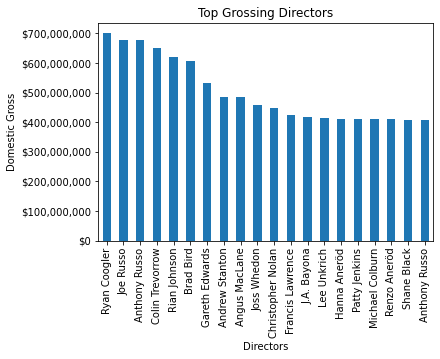

In [22]:
fig, ax = plt.subplots()

directors['domestic_gross'].plot(kind='bar', ax = ax)

ax.yaxis.set_major_formatter('${x:,.0f}')

plt.title('Top Grossing Directors')
plt.xlabel('Directors')
plt.ylabel('Domestic Gross');



## Recommending an Actor

For my second recommendation I planned to complete my analysis on was who acted in the movies with the highest gross revenue.

In [23]:
#sort table category by actor and actress
actors = all_titles.loc[(all_titles['category'] == 'actor') | (all_titles['category'] == 'actress')]

In [24]:
actors.sort_values(by='domestic_gross', ascending=False).head(20)

,person_id,primary_name,movie_id,ordering,category,primary_title,original_title,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,year
24390,nm1569276,Chadwick Boseman,tt1825683,1,actor,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24391,nm1775091,Danai Gurira,tt1825683,4,actress,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24385,nm0430107,Michael B. Jordan,tt1825683,2,actor,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
24389,nm2143282,Lupita Nyong'o,tt1825683,3,actress,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
5447,nm1165110,Chris Hemsworth,tt4154756,2,actor,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,BV,678800000.0,2018
5446,nm0749263,Mark Ruffalo,tt4154756,3,actor,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,BV,678800000.0,2018
5449,nm0262635,Chris Evans,tt4154756,4,actor,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,BV,678800000.0,2018
5451,nm0000375,Robert Downey Jr.,tt4154756,1,actor,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,BV,678800000.0,2018
2585,nm0695435,Chris Pratt,tt0369610,1,actor,Jurassic World,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,2015
2586,nm0397171,Bryce Dallas Howard,tt0369610,2,actress,Jurassic World,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,2015


In [25]:
#grouped the actors table by primary name and added domestic gross of each movie they appeared in, then sorted values from high to low
actors = actors.groupby('primary_name', as_index=False)['domestic_gross'].sum().sort_values('domestic_gross', ascending = (False))


In [26]:
actors.head(20)

,primary_name,domestic_gross
5137,Robert Downey Jr.,2.967300e+09
1587,Dwayne Johnson,2.442400e+09
1054,Chris Hemsworth,2.164900e+09
2736,Jennifer Lawrence,2.164476e+09
1053,Chris Evans,2.049506e+09
1068,Chris Pratt,1.948403e+09
3990,Mark Ruffalo,1.860446e+09
6204,Vin Diesel,1.819900e+09
3654,Liam Hemsworth,1.712000e+09
3995,Mark Wahlberg,1.680300e+09


In [27]:
#actors.set_index('primary_name', inplace = True)

In [28]:
actors = actors.head(25)

## Actor Bar Graph

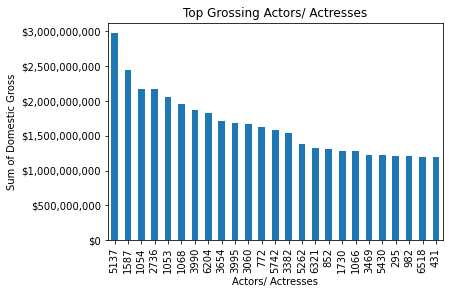

In [29]:
fig, ax = plt.subplots()

actors['domestic_gross'].plot(kind='bar', ax = ax)

ax.yaxis.set_major_formatter('${x:,.0f}')

plt.title('Top Grossing Actors/ Actresses')
plt.xlabel('Actors/ Actresses')
plt.ylabel('Sum of Domestic Gross');

## Recommending a Genre

For my last recommendation I completed my analysis on the top genre of movies with the highest gross revenue. I merged the table from movie basics in the IMDB dataset with the Box office Mojo CSV.

In [30]:
pd.read_sql("""
SELECT *
  FROM 'movie_basics';
""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [31]:
sql_basics = pd.read_sql("""
SELECT *
  FROM 'movie_basics';
""", conn)

In [32]:
sql_basics['primary_title'].rename('title', inplace = True)

0                                           Sunghursh
1                     One Day Before the Rainy Season
2                          The Other Side of the Wind
3                                     Sabse Bada Sukh
4                            The Wandering Soap Opera
                             ...                     
146139                            Kuambil Lagi Hatiku
146140    Rodolpho Teóphilo - O Legado de um Pioneiro
146141                                Dankyavar Danka
146142                                         6 Gunn
146143                 Chico Albuquerque - Revelações
Name: title, Length: 146144, dtype: object

In [33]:
sql_basics.rename(columns = {'primary_title':'title'}, inplace = True)

titles_2 = pd.merge(sql_basics, bom_df, how = 'left', on='title')

In [34]:
titles_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146146 entries, 0 to 146145
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146146 non-null  object 
 1   title            146146 non-null  object 
 2   original_title   146125 non-null  object 
 3   start_year       146146 non-null  int64  
 4   runtime_minutes  114407 non-null  float64
 5   genres           140738 non-null  object 
 6   studio           3363 non-null    object 
 7   domestic_gross   3342 non-null    float64
 8   foreign_gross    2043 non-null    object 
 9   year             3366 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 12.3+ MB


In [35]:
titles_2.isna().sum()

movie_id                0
title                   0
original_title         21
start_year              0
runtime_minutes     31739
genres               5408
studio             142783
domestic_gross     142804
foreign_gross      144103
year               142780
dtype: int64

I used the isna and sum functions to find the total of missing data points in the new genre table. I decided to drop runtime minutes and foreign gross becasue I wasn't planning to use them in my analysis. 

In [36]:

titles_2.drop(columns = ['runtime_minutes','foreign_gross'], inplace = True)

In [37]:
titles_2.isna().sum()

movie_id               0
title                  0
original_title        21
start_year             0
genres              5408
studio            142783
domestic_gross    142804
year              142780
dtype: int64

In [38]:
titles_2.dropna(subset = ['original_title','genres', 'studio', 'domestic_gross', 'year'], inplace = True)

In [39]:
titles_2 = titles_2.assign(genres=titles_2.genres.str.split(",")).explode("genres")

In [40]:
titles_2.head()

,movie_id,title,original_title,start_year,genres,studio,domestic_gross,year
38,tt0315642,Wazir,Wazir,2016,Action,Relbig.,1100000.0,2016.0
38,tt0315642,Wazir,Wazir,2016,Crime,Relbig.,1100000.0,2016.0
38,tt0315642,Wazir,Wazir,2016,Drama,Relbig.,1100000.0,2016.0
48,tt0337692,On the Road,On the Road,2012,Adventure,IFC,744000.0,2012.0
48,tt0337692,On the Road,On the Road,2012,Drama,IFC,744000.0,2012.0


In [41]:
titles_2.isna().sum()

movie_id          0
title             0
original_title    0
start_year        0
genres            0
studio            0
domestic_gross    0
year              0
dtype: int64

Below I grouped by genres and calculated the mean of the domestic gross revenue, then sorted the results from highest to lowest.

In [42]:
top_genres = titles_2.groupby('genres').mean().sort_values(by = 'domestic_gross', ascending = False)

In [43]:
top_genres.head()

,start_year,domestic_gross,year
genres,,,
Sci-Fi,2013.905797,1.083885e+08,2014.094203
Adventure,2014.173423,9.440941e+07,2014.283784
Animation,2014.205128,8.732619e+07,2014.480769
Action,2014.048632,5.841816e+07,2014.088146
Fantasy,2014.005682,5.277712e+07,2014.130682


## Genre Bar Graph

I plotted the table of genres by highest grossing revenue below

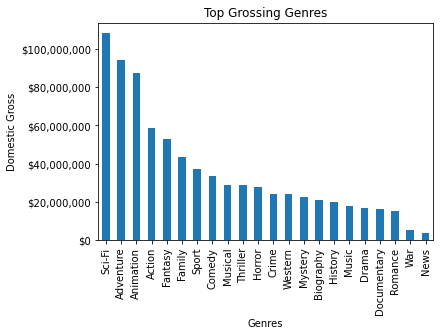

In [44]:
fig, ax = plt.subplots()

top_genres['domestic_gross'].plot(kind='bar', ax = ax)

ax.yaxis.set_major_formatter('${x:,.0f}')

plt.title('Top Grossing Genres')
plt.xlabel('Genres')
plt.ylabel('Domestic Gross');
